In [17]:
from collections.abc import Iterable
import matplotlib.pyplot as plt

In [18]:
def frange(start: float, stop: float, step: float) -> Iterable[float]:
    while start < stop:
        yield round(start, 10)
        start += step

def iota(start: float, end: float, step: float) -> list:
    array = []
    for i in frange(start, end, step):
        array.append(i)
    return array

In [19]:
def encode_srgb(values: list) -> list:
    converted_values = []
    for value in values:
        if value <= 0.0031308:
            srgb_value = value * 12.92
        else:
            srgb_value = 1.055 * pow(value, 1/2.4) - 0.055
        converted_values.append(srgb_value)
    return converted_values

def gamma_correction(values: list, gamma: float = 2.2) -> list:
    converted_values = []
    for value in values:
        gamma_value = pow(value, gamma)
        converted_values.append(gamma_value)
    return converted_values

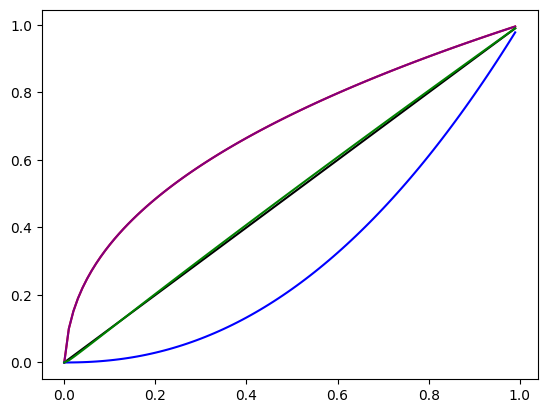

In [20]:
ranges = iota(0, 1.0, 0.01)
srgb = encode_srgb(ranges)
gamma = gamma_correction(ranges, 1/2.2)
gamma_from_linear = gamma_correction(ranges)
gamma_from_srgb = gamma_correction(srgb)
plt.plot(ranges, ranges, color="black", label="linear")
plt.plot(ranges, srgb, color="red", label="srgb")
plt.plot(ranges, srgb, color="purple", label="1/2.2 correction")
plt.plot(ranges, gamma_from_linear, color="blue", label="gamma from linear")
plt.plot(ranges, gamma_from_srgb, color="green", label="gamma from srgb")